## **Projeto 3 - Prevendo a venda de um carro**

Trata-se de um banco de dados fictício em que cada linha representa um carro à venda em uma loja online. 
Os carros são de diversos donos diferentes, e alguns desses carros foram vendidos e outros não. 


A coluna **`Vendido`** representa os carros que foram ou não vendidos: "1" para os vendidos e "0" para os não. 
Temos três features para cada um dos carros:
- **`milhas_por_ano`** representa quantas milhas o carro fez por ano
- **`ano_do_modelo`** representa o ano de cada modelo (que é diferente do ano de fabricação)
- **`preco`** o preço de venda cada carro.


## **Objeto**

De acordo com estas variáveis, tentarei classificar se um carro será vendido ou não. 
Pensando no negócio da empresa, com esse tipo de informação, ela poderia ajudar seus clientes a concretizar sua venda, criando condições mais atrativas para possíveis compradores com base em dados reais e de acordo com as características de cada carro.

Abaixo os cinco primeiros carros da tabela.

In [1]:
import pandas as pd

# dados = pd.read_csv("https://gist.githubusercontent.com/guilhermesilveira/dd7ba8142321c2c8aaa0ddd6c8862fcc/raw/e694a9b43bae4d52b6c990a5654a193c3f870750/precos.csv")
dados = pd.read_csv("../Data/precos.csv")
dados.head()

,milhas_por_ano,ano_do_modelo,preco,vendido
0,21801,2000,30941.02,1
1,7843,1998,40557.96,1
2,7109,2006,89627.50,0
3,26823,2015,95276.14,0
4,7935,2014,117384.68,1


In [2]:
dados["km_por_ano"] = dados["milhas_por_ano"] * 1.60934
dados.head()

,milhas_por_ano,ano_do_modelo,preco,vendido,km_por_ano
0,21801,2000,30941.02,1,35085.22134
1,7843,1998,40557.96,1,12622.05362
2,7109,2006,89627.50,0,11440.79806
3,26823,2015,95276.14,0,43167.32682
4,7935,2014,117384.68,1,12770.11290


In [3]:
from datetime import datetime
dados["idade"] = datetime.today().year - dados['ano_do_modelo']
dados.head()

,milhas_por_ano,ano_do_modelo,preco,vendido,km_por_ano,idade
0,21801,2000,30941.02,1,35085.22134,25
1,7843,1998,40557.96,1,12622.05362,27
2,7109,2006,89627.50,0,11440.79806,19
3,26823,2015,95276.14,0,43167.32682,10
4,7935,2014,117384.68,1,12770.11290,11


In [4]:
dados.drop(["milhas_por_ano", "ano_do_modelo"], axis=1, inplace=True)
dados.head()

,preco,vendido,km_por_ano,idade
0,30941.02,1,35085.22134,25
1,40557.96,1,12622.05362,27
2,89627.50,0,11440.79806,19
3,95276.14,0,43167.32682,10
4,117384.68,1,12770.11290,11


In [5]:
x = dados[["preco", "idade", "km_por_ano"]]
y = dados["vendido"]

## SVC

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

seed = 20

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, random_state=seed, stratify=y)

print(f"Treinaremos com: {raw_treino_x.shape}")
print(f"Testaremos  com: {raw_teste_x.shape}")

scaler = StandardScaler()
scaler.fit(raw_treino_x)

treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC(gamma='auto', probability=True)
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print(f"A acurácia foi de {acuracia:.2f}%")

Treinaremos com: (7500, 3)
Testaremos  com: (2500, 3)
A acurácia foi de 75.92%


In [7]:
raw_treino_x.head()

,preco,idade,km_por_ano
5794,52015.02,27,43527.81898
6106,48109.83,19,35353.98112
8810,89586.74,22,10211.26230
9338,54703.25,21,33295.63526
480,49765.05,18,25313.30886


In [8]:
treino_x

array([[-0.51597811,  1.3079365 ,  2.55393928],
       [-0.67102459, -0.3972521 ,  1.54323498],
       [ 0.97571953,  0.24219362, -1.56569062],
       ...,
       [ 0.8049099 ,  1.09478792,  1.07201077],
       [ 1.63314574,  1.3079365 ,  0.24657242],
       [-0.76316972,  0.4553422 , -0.05948452]], shape=(7500, 3))

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score

confusion = confusion_matrix(y_true=teste_y, y_pred=previsoes, labels=[0, 1])
print(confusion)
tn, fp, fn, tp = confusion.ravel()
print(f"Verdadeiros negativos: {tn}")
print(f"Falsos positivos: {fp}")
print(f"Falsos negativos: {fn}")
print(f"Verdadeiros positivos: {tp}")

[[ 782  268]
 [ 334 1116]]
Verdadeiros negativos: 782
Falsos positivos: 268
Falsos negativos: 334
Verdadeiros positivos: 1116


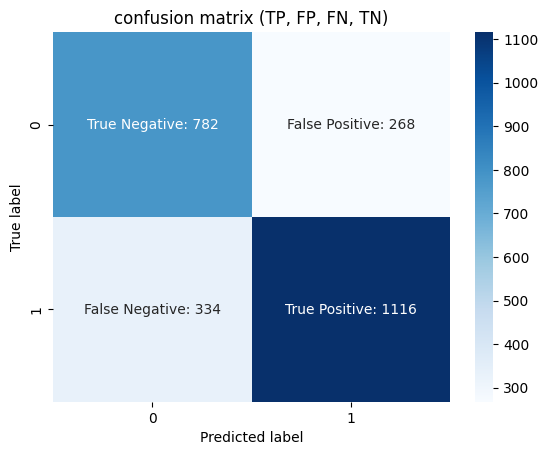

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Geração dos rótulos personalizados
group_names = [
    f"True Negative: {tn}",  f"False Positive: {fp}",
    f"False Negative: {fn}", f"True Positive: {tp}"
]
labels = np.asarray(group_names).reshape(2, 2)

# Plotando com seaborn
sns.heatmap(confusion,
            annot=labels, # Adiciona os rótulos personalizados
            # annot = True # Adiciona os valores reais
            fmt='', # Formato vazio para não adicionar formatação extra
            cmap='Blues', # Mapa de cores
            # cbar=False, # Remove a barra de cores
            xticklabels=["0", "1"],
            yticklabels=["0", "1"])
# Títulos dos eixos
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('confusion matrix (TP, FP, FN, TN)')
plt.show()

AUC manual: 0.82875107


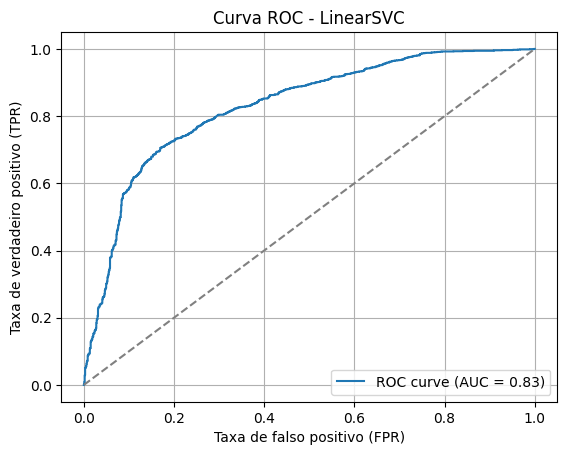

In [11]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import RocCurveDisplay


# Obter scores com decision_function (não há predict_proba aqui)
scores = modelo.predict_proba(teste_x)

# Calcular curva ROC
fpr, tpr, thresholds = roc_curve(y_true = teste_y, y_score=scores[:,1])
roc_auc_manual = auc(x = fpr, y = tpr)
print(f"AUC manual: {roc_auc_manual:.8f}")

# Plotar curva ROC
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc_manual:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # linha aleatória
plt.xlabel("Taxa de falso positivo (FPR)")
plt.ylabel("Taxa de verdadeiro positivo (TPR)")
plt.title("Curva ROC - LinearSVC")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [12]:
# AUC direto
auc_direto = roc_auc_score(y_true = teste_y, y_score = scores[:,1])
print(f"AUC direto: {auc_direto:.8f}")

AUC direto: 0.82875107


## LinearSVC

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         random_state = SEED,
                                                         stratify = y)
print(f"Treinaremos com {len(raw_treino_x)}")
print(f"Testaremos com {len(raw_teste_x)}")


scaler = StandardScaler()
scaler.fit(raw_treino_x)

treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)


modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print(f"A acurácia foi de {acuracia:.2f}%")

Treinaremos com 7500
Testaremos com 2500
A acurácia foi de 71.00%


In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score

confusion = confusion_matrix(y_true=teste_y, y_pred=previsoes, labels=[0, 1])
print(confusion)
tn, fp, fn, tp = confusion.ravel()
print(f"Verdadeiros negativos: {tn}")
print(f"Falsos positivos: {fp}")
print(f"Falsos negativos: {fn}")
print(f"Verdadeiros positivos: {tp}")

[[ 624  426]
 [ 299 1151]]
Verdadeiros negativos: 624
Falsos positivos: 426
Falsos negativos: 299
Verdadeiros positivos: 1151


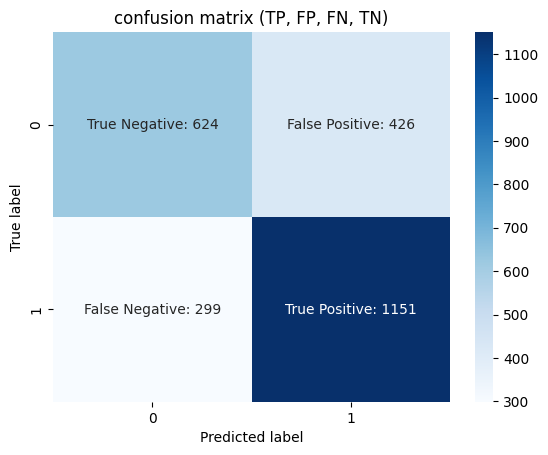

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Geração dos rótulos personalizados
group_names = [
    f"True Negative: {tn}",  f"False Positive: {fp}",
    f"False Negative: {fn}", f"True Positive: {tp}"
]
labels = np.asarray(group_names).reshape(2, 2)

# Plotando com seaborn
sns.heatmap(confusion,
            annot=labels, # Adiciona os rótulos personalizados
            # annot = True # Adiciona os valores reais
            fmt='', # Formato vazio para não adicionar formatação extra
            cmap='Blues', # Mapa de cores
            # cbar=False, # Remove a barra de cores
            xticklabels=["0", "1"],
            yticklabels=["0", "1"])
# Títulos dos eixos
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('confusion matrix (TP, FP, FN, TN)')
plt.show()

AUC manual: 0.78760920


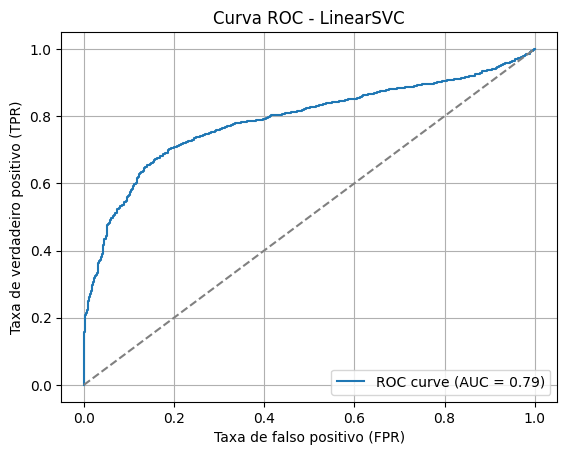

In [16]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import RocCurveDisplay


# Obter scores com decision_function (não há predict_proba aqui)
scores = modelo.decision_function(teste_x)

# Calcular curva ROC
fpr, tpr, thresholds = roc_curve(y_true = teste_y, y_score=scores)
roc_auc_manual = auc(x = fpr, y = tpr)
print(f"AUC manual: {roc_auc_manual:.8f}")

# Plotar curva ROC
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc_manual:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # linha aleatória
plt.xlabel("Taxa de falso positivo (FPR)")
plt.ylabel("Taxa de verdadeiro positivo (TPR)")
plt.title("Curva ROC - LinearSVC")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [18]:
# AUC direto
auc_direto = roc_auc_score(y_true = teste_y, y_score = scores)
print(f"AUC direto: {auc_direto:.8f}")

AUC direto: 0.78760920


## DummyClassifier

In [19]:
treino_x

array([[ 1.62663622,  0.66907903, -0.62913537],
       [-0.33714655,  0.24235232, -1.31870128],
       [ 0.76029211,  0.66907903,  0.65698987],
       ...,
       [ 1.5520527 ,  0.45571567,  1.5672967 ],
       [ 0.44233999,  0.02898897, -0.99218034],
       [-0.0212041 ,  1.09580574, -0.67583824]], shape=(7500, 3))

In [20]:
teste_x

array([[ 0.74789957,  0.45571567, -0.20282198],
       [-0.73801061,  1.30916909, -1.31450999],
       [-0.99485169,  0.66907903, -0.47904751],
       ...,
       [ 1.63777207,  1.30916909, -0.99716997],
       [ 1.61990573,  0.45571567, -0.88799701],
       [-0.07075881,  0.66907903, -0.44451932]], shape=(2500, 3))

In [21]:
from sklearn.dummy import DummyClassifier

dummy_stratified = DummyClassifier()
dummy_stratified.fit(treino_x, treino_y)
acuracia = dummy_stratified.score(teste_x, teste_y) * 100

print("A acurácia do dummy stratified foi %.2f%%" % acuracia)

A acurácia do dummy stratified foi 58.00%


## DecisionTreeClassifier

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

decision_tree_modelo = DecisionTreeClassifier(max_depth=3)
decision_tree_modelo.fit(raw_treino_x, treino_y)
decision_tree_previsoes = decision_tree_modelo.predict(raw_teste_x)

decision_tree_acuracia = accuracy_score(teste_y, decision_tree_previsoes) * 100
print("A acurácia foi %.2f%%" % decision_tree_acuracia)


Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 79.28%


In [23]:
decision_tree_previsoes

array([0, 1, 1, ..., 1, 1, 0], shape=(2500,))

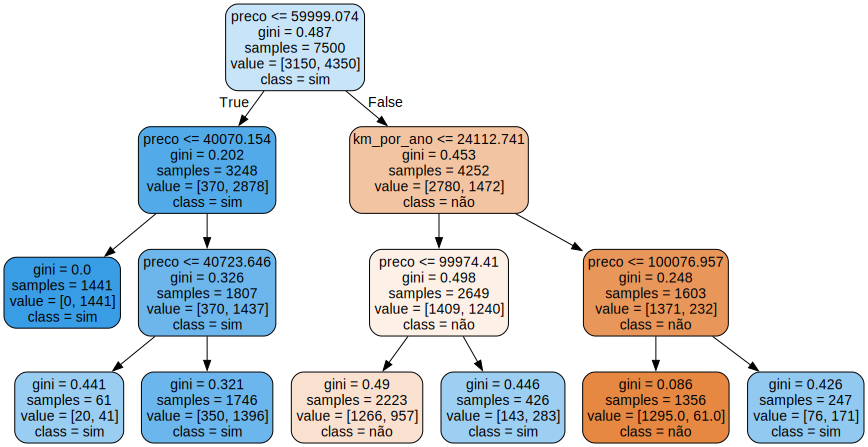

In [24]:
from sklearn.tree import export_graphviz
import graphviz

features = x.columns
dot_data = export_graphviz(decision_tree=decision_tree_modelo, out_file=None,
                           filled = True, rounded = True,
                           feature_names = features,
                          class_names = ["não", "sim"])
grafico = graphviz.Source(dot_data)
grafico

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score

decision_tree_confusion = confusion_matrix(y_true=teste_y, y_pred=decision_tree_previsoes, labels=[0, 1])
print(decision_tree_confusion)
tn, fp, fn, tp = decision_tree_confusion.ravel()
print(f"Verdadeiros negativos: {tn}")
print(f"Falsos positivos: {fp}")
print(f"Falsos negativos: {fn}")
print(f"Verdadeiros positivos: {tp}")

[[ 853  197]
 [ 321 1129]]
Verdadeiros negativos: 853
Falsos positivos: 197
Falsos negativos: 321
Verdadeiros positivos: 1129


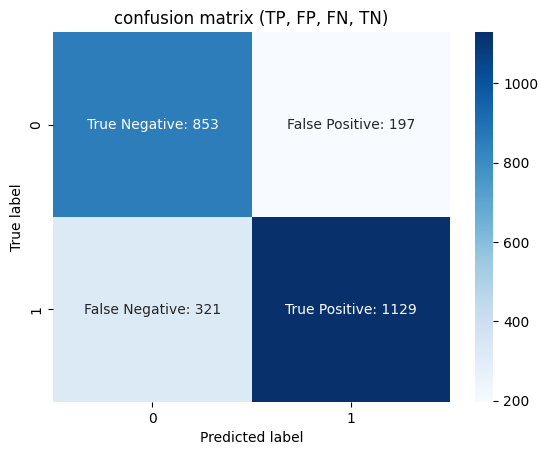

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Geração dos rótulos personalizados
group_names = [
    f"True Negative: {tn}",  f"False Positive: {fp}",
    f"False Negative: {fn}", f"True Positive: {tp}"
]
labels = np.asarray(group_names).reshape(2, 2)

# Plotando com seaborn
sns.heatmap(decision_tree_confusion,
            annot=labels, # Adiciona os rótulos personalizados
            # annot = True # Adiciona os valores reais
            fmt='', # Formato vazio para não adicionar formatação extra
            cmap='Blues', # Mapa de cores
            # cbar=False, # Remove a barra de cores
            xticklabels=["0", "1"],
            yticklabels=["0", "1"])
# Títulos dos eixos
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('confusion matrix (TP, FP, FN, TN)')
plt.show()

AUC manual: 0.87728604


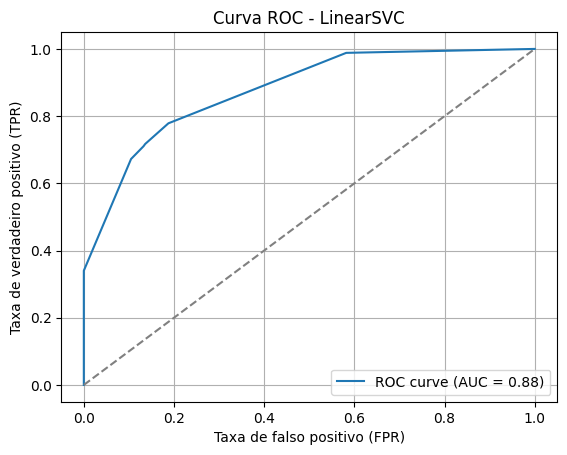

In [27]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import RocCurveDisplay


decision_tree_scores = decision_tree_modelo.predict_proba(raw_teste_x)

# Calcular curva ROC
fpr, tpr, thresholds = roc_curve(y_true = teste_y, y_score=decision_tree_scores[:,1])
decision_tree_roc_auc_manual = auc(x = fpr, y = tpr)
print(f"AUC manual: {decision_tree_roc_auc_manual:.8f}")

# Plotar curva ROC
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {decision_tree_roc_auc_manual:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # linha aleatória
plt.xlabel("Taxa de falso positivo (FPR)")
plt.ylabel("Taxa de verdadeiro positivo (TPR)")
plt.title("Curva ROC - LinearSVC")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [28]:
# AUC direto
decision_tree_auc_direto = roc_auc_score(y_true = teste_y, y_score = decision_tree_scores[:,1])
print(f"AUC direto: {decision_tree_auc_direto:.8f}")

AUC direto: 0.87728604
